##### Write your code wherever specified and do not change the other code


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

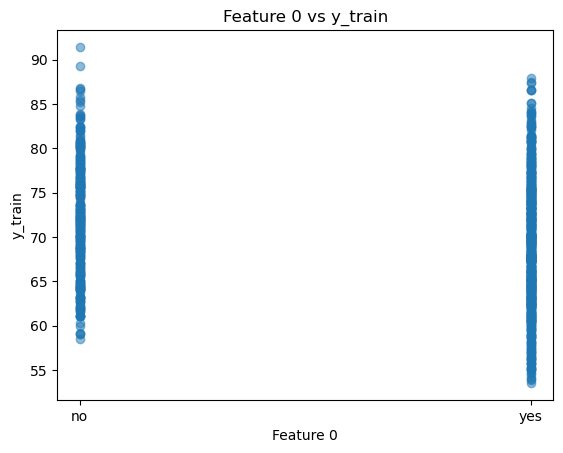

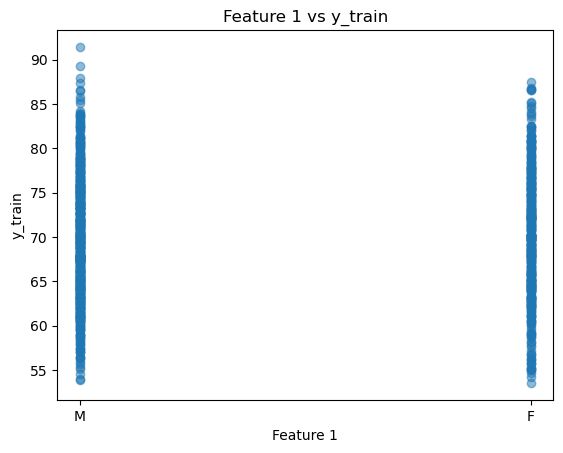

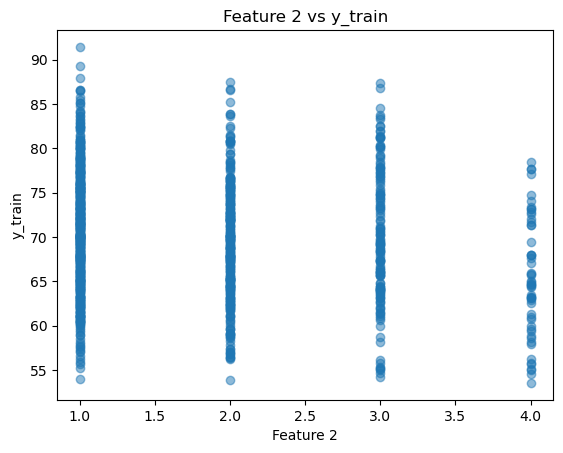

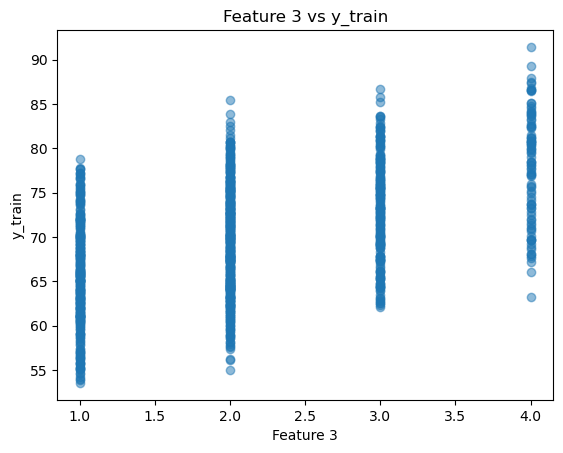

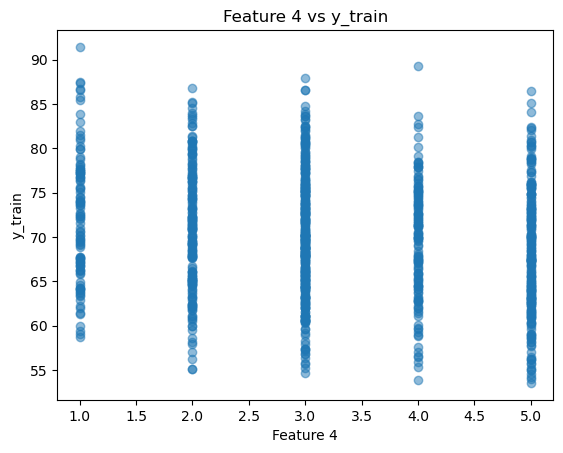

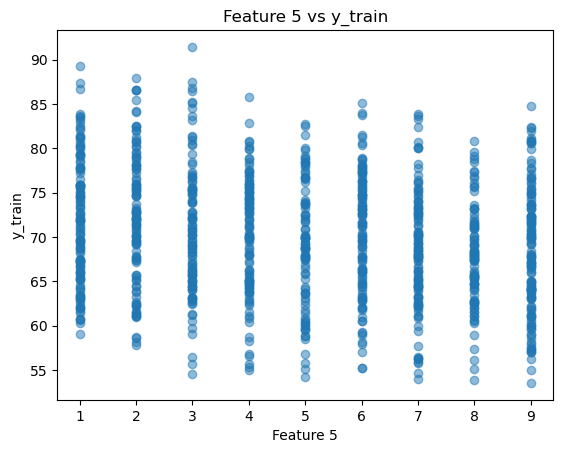

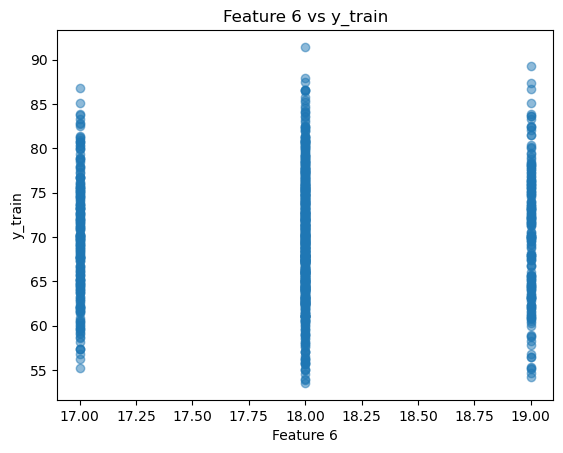

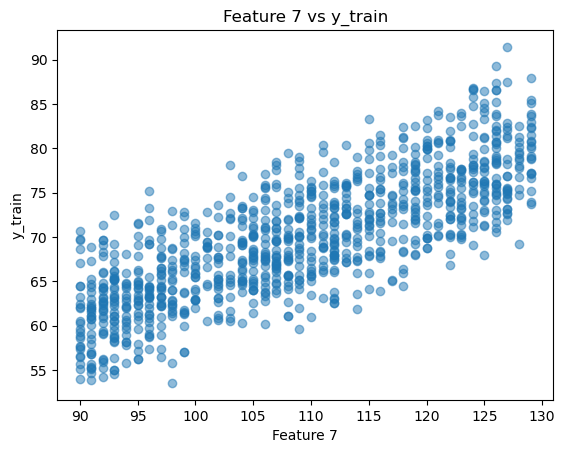

In [102]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    label_encoders = {}
    for col in range(x_train.shape[1]):
        # Check if the column is not numeric
        if not np.issubdtype(x_train[:, col].dtype, np.number):
            le = LabelEncoder()
            x_train[:, col] = le.fit_transform(x_train[:, col])
            label_encoders[col] = le
    if x_train.shape[1] > 1:
        interaction_term = x_train[:, 0].astype(float) * x_train[:, 1].astype(float)
        x_train = np.hstack((x_train, interaction_term.reshape(-1, 1)))
    return x_train
def visualize_features(x_train, y_train):
    for i in range(x_train.shape[1]):
        plt.figure()
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.title(f'Feature {i} vs y_train')
        plt.xlabel(f'Feature {i}')
        plt.ylabel('y_train')
        plt.show()
visualize_features(x_train, y_train)
x_train = feature_changing(x_train)

In [103]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [104]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
    m = x_train.shape[0]
    y_pred = np.dot(x_train, w) + b
    loss = (1 / (2 * m)) * np.sum((y_pred - y_train) ** 2)

    return loss

In [105]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
    learning_rate = 0.01
    m = x_train.shape[0]

    for i in range(m):
        y_pred = np.dot(x_train, w) + b
        dw = (1 / m) * np.dot(x_train.T, (y_pred - y_train))  
        db = (1 / m) * np.sum(y_pred - y_train)              
        w -= learning_rate * dw
        b -= learning_rate * db

    return w,b

In [106]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
